# Practica 0: python

En esta practica implementaremos un algortimo de integracion numerica basado en el metodo de Monte Carlo.


Para ello necesitaremos de una funcion para la cual se calculara el area por debajo de la curva en base al metodo previamente mencionado.

# IMPORTS

In [2]:
import time
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
#Funcion que usaremos durante toda la practica.
def f1(x):
    return mt.sin(x)

#Otras opciones:
def f2(x):
    return -(x**(2)-2*x)

# Calculo de valores para el metodo monte carlo

Para implementar este algoritmo necesitaremos una serie de parametros para resolverlo:
    a -> Limite izq de la funcion
    b -> Limite der de la funcion
    M -> Punto mas alto de la funcion en el intervalo (a, b)

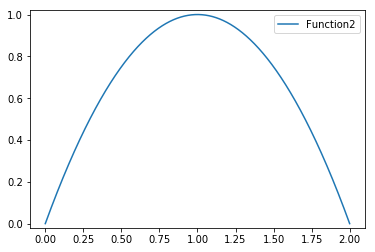

In [27]:
a = 0
b = 2
s = np.linspace(a, b, 10000)
plt.ylim(-0.02, NoLoopMaxY(f2)+0.02)

plt.plot(s, f2(s))
plt.legend(['Function2'])


Ahora calcularemos el punto mas alto de la funcion en ese intervalo.

Se usaran dos metodos diferentes uno con bucles y otro con las herramientas de las librerias.

In [29]:
def LoopMaxY(func):
    max = 0
    
    for i in s:
        if (max < func(i)):
            max = func(i)
            
    return max

LoopMaxY(f2)

0.9999999899979997

In [30]:
def NoLoopMaxY(func):
    funcMax = np.amax(func(s))
    return funcMax

NoLoopMaxY(f2)

0.9999999899979997

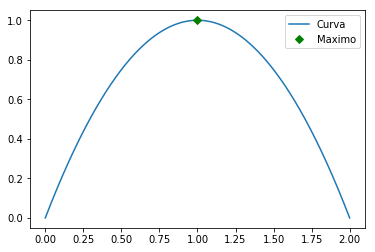

In [33]:
plt.plot(s, f2(s))

#Representamos el maximo Y de la funcion suponiendo que es simetrica
plt.plot((a+b)/2, NoLoopMaxY(f2), 'gD')

plt.legend(['Curva', 'Maximo'])

## Generacion y calculo de puntos aleatorios

A continuacion tendremos que generar un metodo que genere una cantidad n de puntos aleatorios en el intervalo de X(a, b) y en el intervalo de Y(0, MaxY(f2))

In [34]:
def puntos(maxY, a, b, n):
    X = np.random.uniform(a, b, n)
    Y = np.random.uniform(0, maxY, n)
    return (X, Y)

puntos(NoLoopMaxY(f2), 0, 2, 10000)

(array([0.18044161, 1.81746219, 0.15652908, ..., 1.74828924, 0.44773677,
        0.98616731]),
 array([0.5035089 , 0.91098371, 0.05501448, ..., 0.30371944, 0.75383124,
        0.71097252]))

Ahora necesitamos 2 metodos para medir que cantidad de puntos se han quedado por debajo de la curva de la funcion:

- Con Bucles

In [36]:
def NPointsLoop(fun, a, b, n):
    M = NoLoopMaxY(fun)
    puntos_ = puntos(M, a, b, n)
    
    NpDebajo = 0
    for i in range(n):
        if(puntos[1][i] < fun(puntos[0][i])):
            NpDebajo+=1
            
    res = (b-a)*M*(NpDebajo/n)
    print(NpDebajo)
    return res

NPointsLoop(f2, 0, 2, 10000)

TypeError: 'function' object is not subscriptable